# Decision Tree

![Alt text](decision-tree.jpg)

A Decision Tree is a flowchart-like tree structure where an internal node represents a feature (or attribute), the branch represents a decision rule, and each leaf node represents the outcome. In this analysis, we utilize a Decision Tree Classifier to process the Breast Cancer Wisconsin (Diagnostic) dataset. The classifier is constructed during the training phase where the tree is divided into subsets based on the value of the most discriminative features. This process is recursive in nature and is known as recursive partitioning.

The decision criteria and feature importance are learned from the data, which ideally results in a tree where each path from the root to a leaf represents a classification rule. In our specific context, we limit the tree depth to 4 levels to prevent overfitting. This means the tree is allowed to split four times, each time increasing the decision granularity.

The ultimate goal of using a Decision Tree in this context is to predict whether a tumor is benign or malignant based on several descriptive features extracted from a digitized image of a breast mass. After the model is trained, it can be visualized to show the decisions made at each node, providing transparency into the model's classification rules.

## Key Equations and Concepts

The decision to split at each node is based on measures such as Gini impurity, entropy, or classification error. For a binary classification problem, the Gini impurity can be calculated as:

$ Gini(p) = 1 - (p^2 + (1 - p)^2) $

where $ p $ is the probability of class 1 in the node.

Entropy, which is a measure of disorder or uncertainty, can be calculated as:

$ Entropy(p) = -p \log_2(p) - (1 - p) \log_2(1 - p) $

where $ p $ is again the probability of class 1.

The information gain from a split is the change in the measure used, such as the reduction in entropy:

$ Information Gain = Entropy(parent) - [weighted\ average] \times Entropy(children) $

where the weighted average entropy of the children is the sum of the entropies of each child node, weighted by the number of samples in each node.

These measures help to determine the best splits at each node of the tree to optimally separate the classes.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_decision_regions

# Set theme for seaborn
sns.set_theme(style="whitegrid")

In [2]:
# Load the Breast Cancer dataset
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Train a Decision Tree classifier
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

## Visualize the Decision Tree

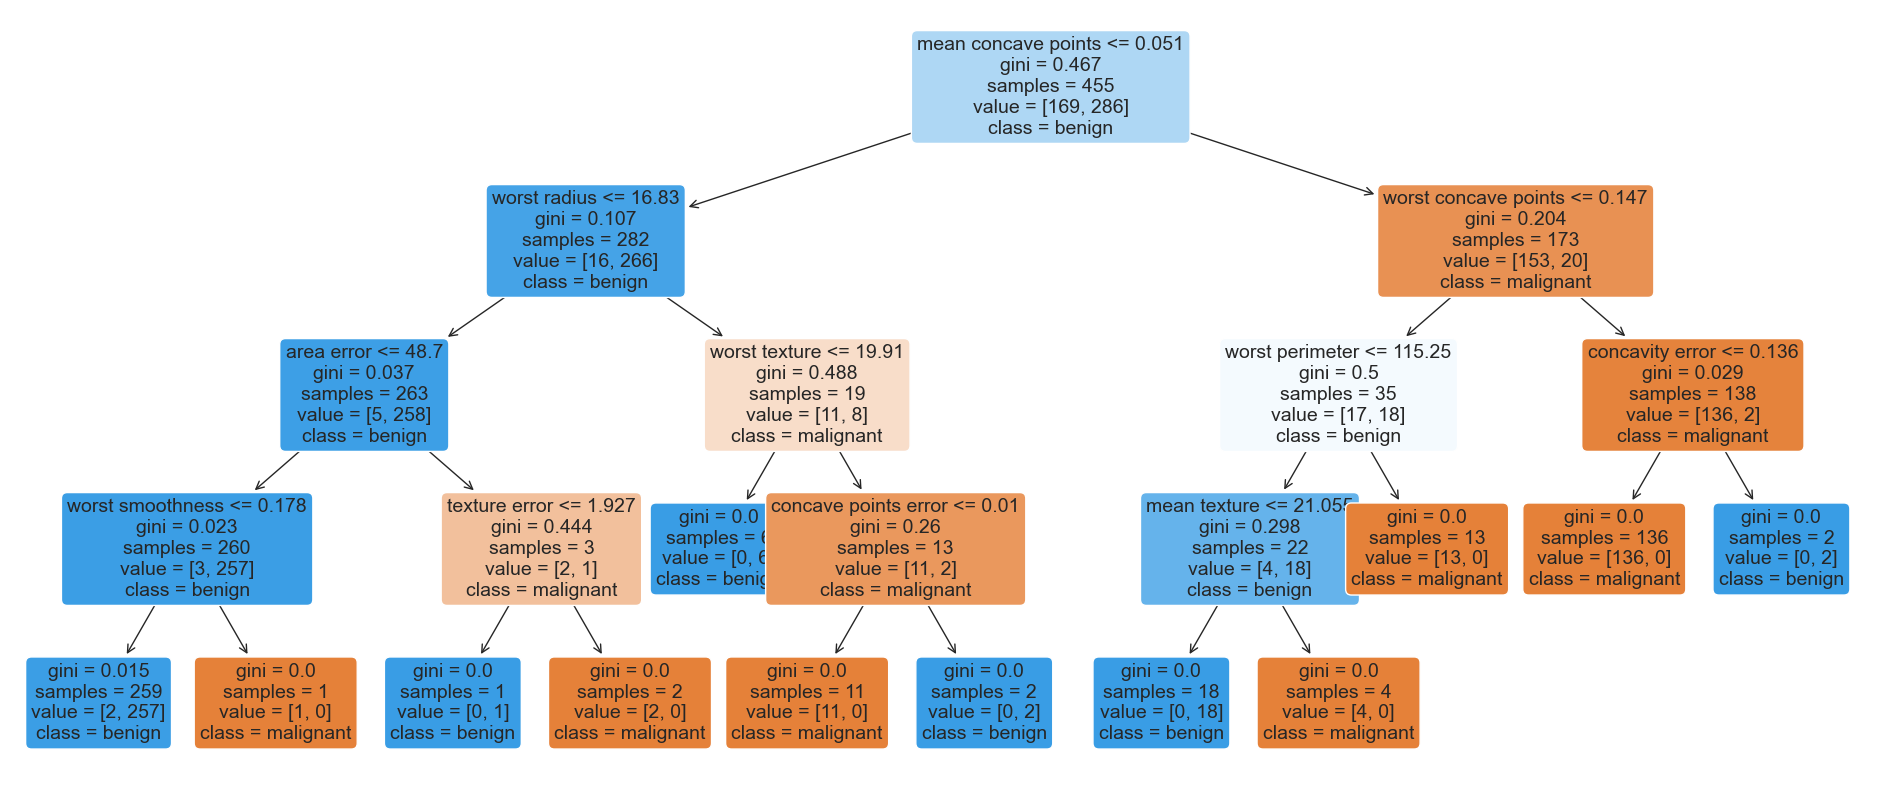

In [4]:
# Convert feature_names and class_names to lists
feature_names_list = cancer_data.feature_names.tolist()
class_names_list = cancer_data.target_names.tolist()

# Visualize the Decision Tree
plt.figure(figsize=(24, 10))
plot_tree(decision_tree, feature_names=feature_names_list, class_names=class_names_list, rounded=True, filled=True, fontsize=14)
plt.show()

## Evaluation Metrics

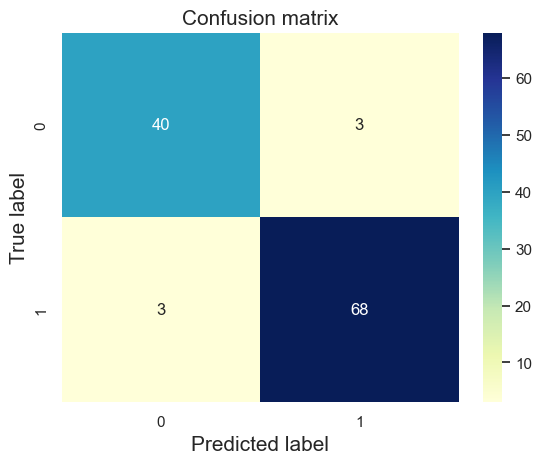

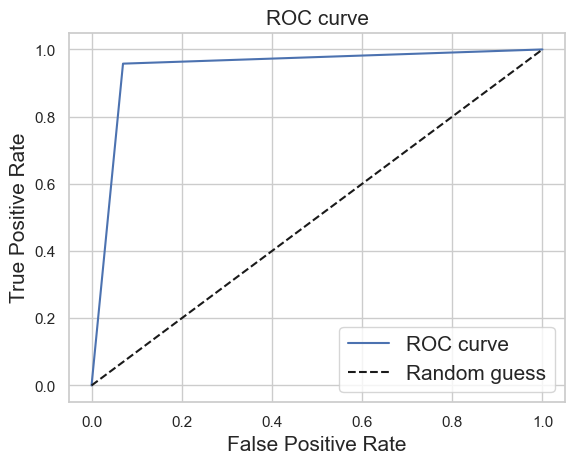

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [5]:
# Predict on the test set
test_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, test_pred_decision_tree)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted label", fontsize=15)
plt.ylabel("True label", fontsize=15)
plt.title("Confusion matrix", fontsize=15)
plt.show()

# Evaluate the model with ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred_decision_tree)
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title("ROC curve", fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.show()

# Print the classification report
print(classification_report(y_test, test_pred_decision_tree, target_names=cancer_data.target_names))

The Decision Tree model demonstrates excellent classification performance on the dataset, as indicated by the ROC curve closely hugging the top-left corner and a high accuracy of 0.95. Both classes show high precision, recall, and F1-scores, signifying the model's strong ability to correctly identify and classify instances of each class. Such metrics suggest that the model not only predicts accurately but also maintains a balanced sensitivity and specificity, which is crucial for medical diagnosis applications where misclassifications can have serious implications.

# Conclusion

The Decision Tree classifier has shown strong performance on the Breast Cancer dataset. The tree's clear structure allows us to understand how it makes classifications, with key features like worst radius and texture being important for prediction.

Looking at the results, the confusion matrix and ROC curve suggest the model is accurate, with an overall accuracy of 95%. It effectively distinguishes between benign and malignant tumors, which is crucial for a medical diagnosis tool.

In short, the model is both accurate and reliable, making it a valuable method for diagnosing breast cancer in clinical settings. 